# ***** PREDICT BREAST CANCER TUMOR FROM LOGISTIC REGRESSION *****

# ------------------------------------------  Pre-requisites  --------------------------------------------

## Importing Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magic Command
%matplotlib inline

## Importing dataset

In [2]:
# Import Dataset

breastCancer = pd.read_csv('Breast_Cancer.TXT')

In [3]:
# Let's check shape

breastCancer.shape

(699, 10)

In [4]:
# Let's check out our dataset

breastCancer.head()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
breastCancer.isna().sum()

clump_thickness                0
cell_shape_uniformity          0
cell_size_uniformity           0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [6]:
breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
cell_shape_uniformity          699 non-null int64
cell_size_uniformity           699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [7]:
breastCancer.describe()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## As we can see in describe() command there are only 9 columns
### There must be some null value, or any character in <strong><i>bare_nuclei</i></strong> column

In [10]:
# Let us check bare_nuclei

breastCancer['bare_nuclei']

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: bare_nuclei, Length: 699, dtype: object

In [8]:
breastCancer['bare_nuclei'][23]

'*'

## Convert *s into nan

In [9]:
breastCancer['bare_nuclei'][breastCancer['bare_nuclei'] == '*'] = np.nan

C:\Users\Mayank\.julia\packages\Conda\m7vem\deps\usr\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
breastCancer['bare_nuclei'][23]

nan

In [12]:
breastCancer['bare_nuclei'].dtype

dtype('O')

## bare_nuclei's datatype is object 
### We need to convert this to numeric before applying Logistic Regression

In [13]:
breastCancer['bare_nuclei'] = pd.to_numeric(breastCancer['bare_nuclei'], errors = 'coerce')

In [14]:
breastCancer['bare_nuclei'].dtype

dtype('float64')

## Checking for null values

In [15]:
breastCancer.isna().sum()

clump_thickness                 0
cell_shape_uniformity           0
cell_size_uniformity            0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

## Replacing null values with mean of bare_nuclei

In [16]:
breastCancer['bare_nuclei'].fillna(np.mean(breastCancer['bare_nuclei']), inplace = True)

In [17]:
breastCancer.isna().sum()

clump_thickness                0
cell_shape_uniformity          0
cell_size_uniformity           0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

#  Data is cleaned (^_^)

# -------------------------------------  Exploratory Data Analysis  ---------------------------------

Number of cells labeled Benign:  458
Number of cells labeled Malignant :  241

Percentage of cells labeled Benign: 65.52 %
Percentage of cells labeled Malignant: 34.48 %


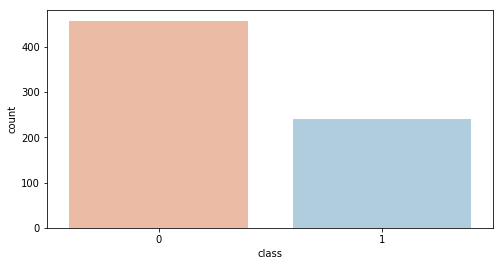

In [18]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(breastCancer['class'], palette='RdBu')

# count number of obvs in each class
benign, malignant = breastCancer['class'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('Percentage of cells labeled Benign:', round(benign / len(breastCancer) * 100, 2), '%')
print('Percentage of cells labeled Malignant:', round(malignant / len(breastCancer) * 100, 2), '%')

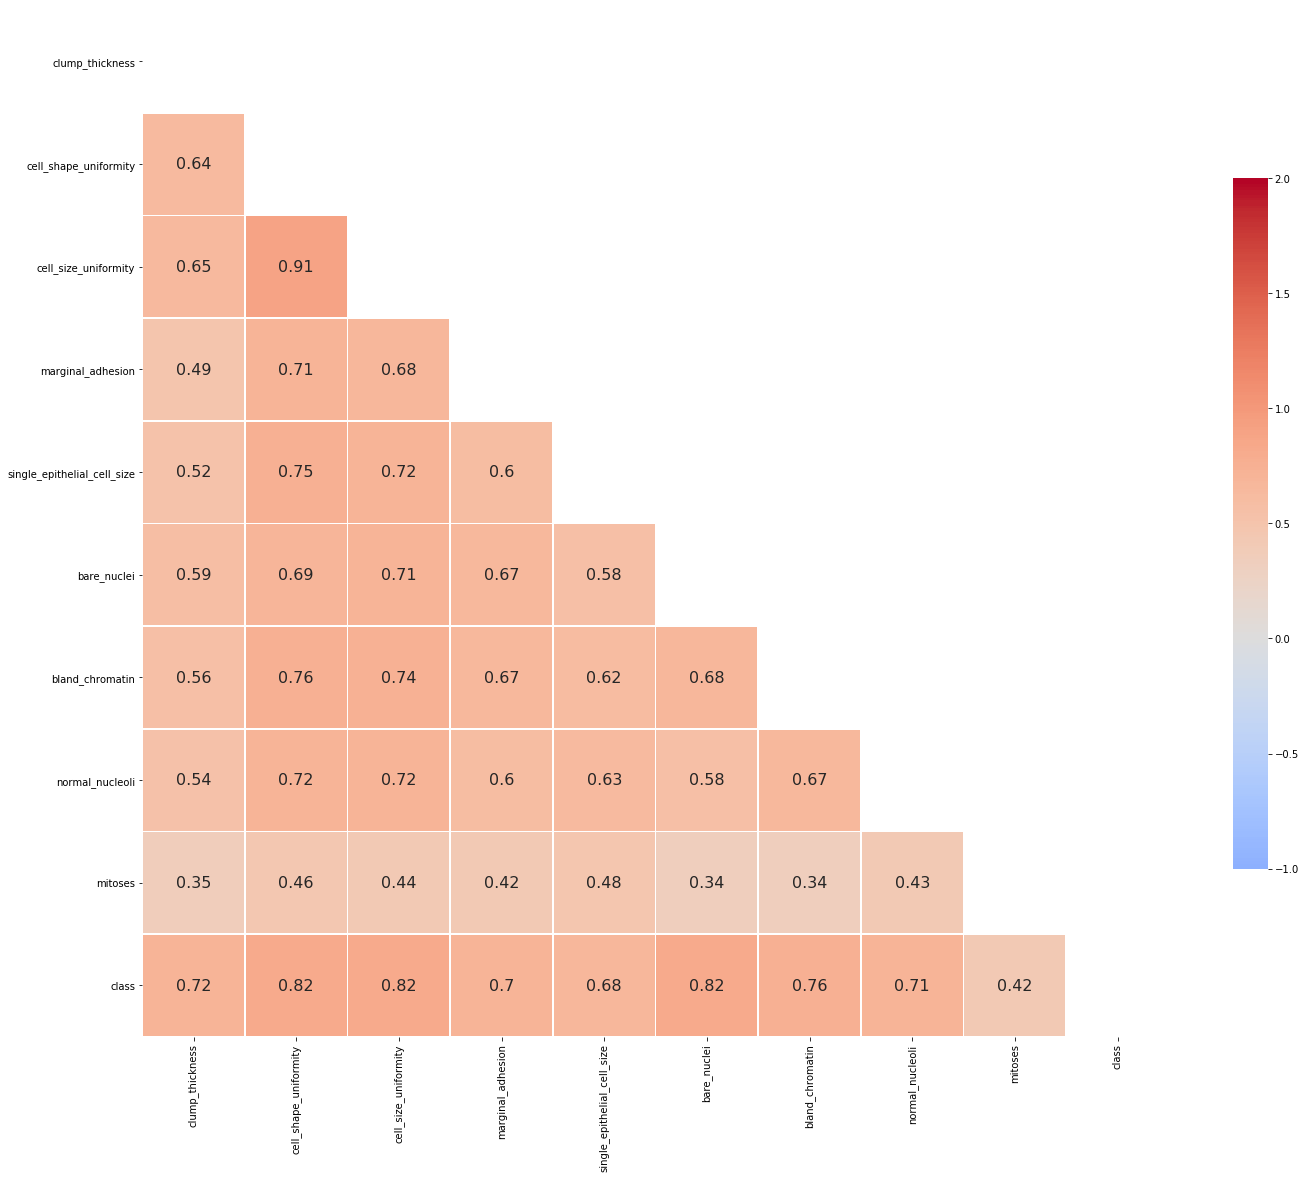

In [19]:
# Generate and visualize the correlation matrix
corr = breastCancer.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmin=-1, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True, annot_kws={"size": 16})

plt.tight_layout()


# -----------------------------------------------------------------------------------------------------------

# Ques.1 
## Build a logistic regression model with "class" as the response variable, and all other remaining variables as the predictors.

# --------------------------------------------------------------------------------------------------------------

# ----------------------------------  Features (X) and Labels (y)  ----------------------------------

## Features

In [20]:
X = breastCancer.iloc[:, :9].values

In [21]:
X.shape

(699, 9)

## Labels

In [22]:
y = breastCancer.iloc[:, -1].values

In [23]:
y.shape

(699,)

# -------------  Splitting our Data into Training and Validation/Test Sets  -------------

In [24]:
# Import necessary modules
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# -----------------------------------  Applying Model for Prediction  ----------------------------

## K-Fold CV comparison

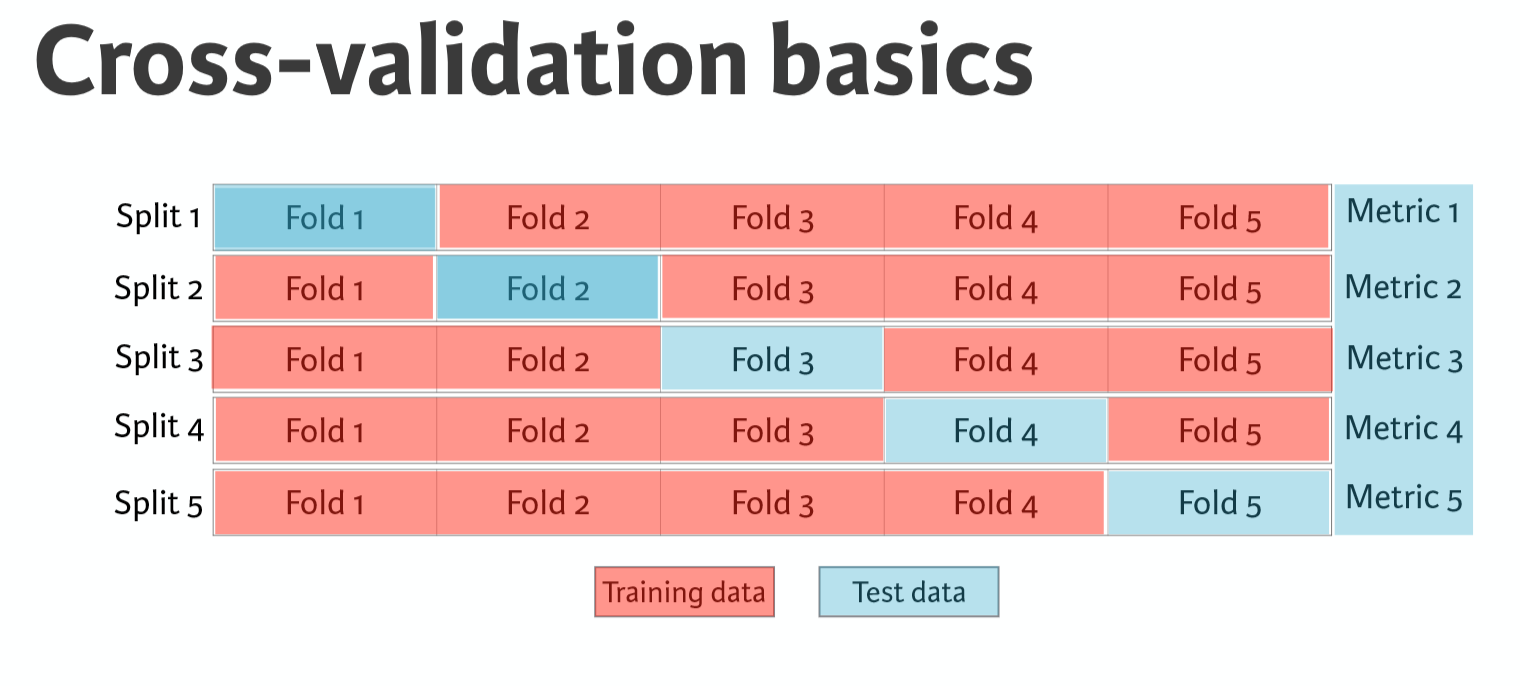

In [25]:
from IPython.display import Image
Image("img/CrossValidation.png")

In [26]:
CV = []
for i in range(2, 13):
    CV.append(i)

In [27]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: LR
LR = LogisticRegression()

# Perform k-fold CV
cvScoresDict = {}
for k in CV:
    cvScoresDict['cvscores_' + str(k)] = np.mean(cross_val_score(LR, X, y, cv=k))

Cross Validation score when k = 2 is 0.9585386819484241
Cross Validation score when k = 3 is 0.9586098746598969
Cross Validation score when k = 4 is 0.9600480482161516
Cross Validation score when k = 5 is 0.9615090420065163
Cross Validation score when k = 6 is 0.9614997477358669
Cross Validation score when k = 7 is 0.9601960196019602
Cross Validation score when k = 8 is 0.9644040658424617
Cross Validation score when k = 9 is 0.962925962925963
Cross Validation score when k = 10 is 0.9600994372029277
Cross Validation score when k = 11 is 0.9630005411255411
Cross Validation score when k = 12 is 0.9644644132735891


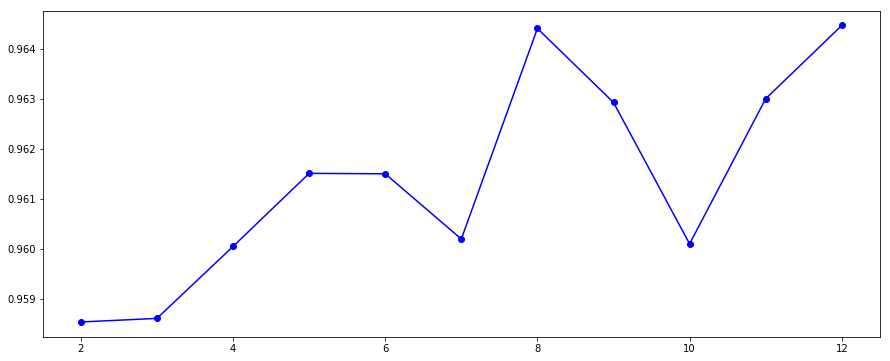

In [28]:
for cv, score in cvScoresDict.items():
    print("Cross Validation score when k = {} is {}".format(cv.split('_')[1], score))
    
plt.figure(figsize=(15, 6))
plt.plot(CV, cvScoresDict.values(), '-ob')

In [29]:
### Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(penalty='l1') # Lasso Regularization

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=8)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score on training set is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2.0235896477251596}
Best score on training set is 0.9599236641221374


# ---------------------------------------  Evaluating Model  --------------------------------------


In [30]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data: y_pred
y_pred = logreg_cv.predict(X_test)

# Generate the confusion matrix and classification report
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred), "\n")

print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix :
 [[105   2]
 [  2  66]] 

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      0.98      0.98       107
          1       0.97      0.97      0.97        68

avg / total       0.98      0.98      0.98       175



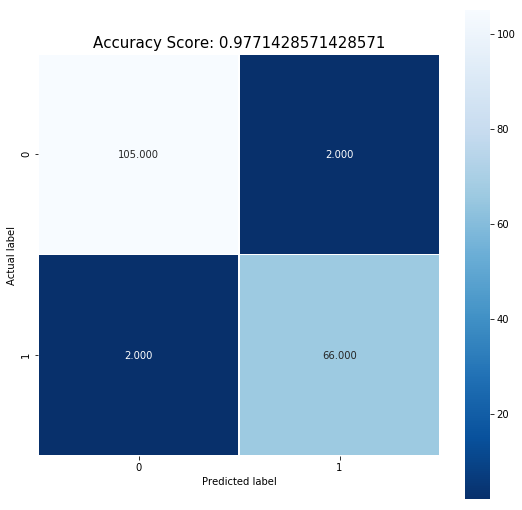

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

## Accuracy (^_^)

In [32]:
print("The accuracy on test set is: ", logreg_cv.score(X_test, y_test))

The accuracy on test set is:  0.9771428571428571


# -----------------------------------------------------------------------------------------------------------

# Ques. 2 
## What is the value of the deviance difference? Is the overall logistic regression significant? Explain your answer. What does it mean to say that the overall logistic regression is significant?

# -----------------------------------------------------------------------------------------------------------

In [33]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [34]:
plogit = smf.glm(formula = 'y ~ clump_thickness+cell_shape_uniformity+cell_size_uniformity+marginal_adhesion+ \
                single_epithelial_cell_size+bare_nuclei+bland_chromatin+normal_nucleoli+mitoses', 
                data = breastCancer, family=sm.families.Binomial()).fit()

In [35]:
plogit.llf

-58.16032292366613

In [36]:
-2 * plogit.llf

116.32064584733226

# -----------------------------------------------------------------------------------------------------------

# Ques. 3
## Without reference to inferential significance, express the form of the logit.

# -----------------------------------------------------------------------------------------------------------

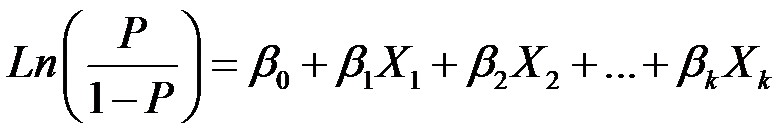

In [37]:
from IPython.display import Image
Image("img/logit.png")

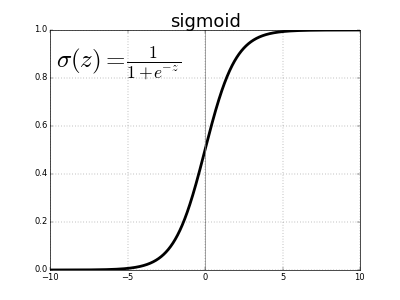

In [38]:
from IPython.display import Image
Image("img/sigmoid.png")

# -----------------------------------------------------------------------------------------------------------

# Ques. 4
## Which variables do not appear to be significant predictors of breast cancer tumor class? Explain your answer.

# -----------------------------------------------------------------------------------------------------------

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
X.shape

(699, 9)

In [41]:
y.shape

(699,)

In [42]:
logit = sm.Logit(y, X[:,[0,1,2,3,4,5,6,7,8]])
result = logit.fit()

result.summary2(alpha=0.05)

Optimization terminated successfully.
         Current function value: 0.396362
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.385     
Dependent Variable: y                AIC:              572.1141  
Date:               2018-10-13 10:51 BIC:              613.0609  
No. Observations:   699              Log-Likelihood:   -277.06   
Df Model:           8                LL-Null:          -450.26   
Df Residuals:       690              LLR p-value:      5.2770e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.3171      0.0549    -5.7805    0.0000    -0.4247    -0.2096
x2     0.9097      0.1249     7.2844    0.0000     0.6649     1.1545
x3     0.1753      0.1043     1.6814    0.0927    -0.0291     0.3797
x4     0.1211      0.0721     1.6810    0.0928    -0.0201     0.2624
x5    -0.7831      0.0978    -8.0030    0.0000    -0.9748    -0.5913
x6     0.4986      0.0591     8.4322    0.0000     0.3827     0.6145
x7    -0.5030      0.0870    -5.7809    0.0000    -0.6735    -0.3325
x8     0.3189      0.0693     4.6042    0.0000     0.1832     0.4547
x9    -0.2224      0.0843    -2.6375    0.0084    -0.3877    -0.0571
=================================================================

"""

In [43]:
#marginal_adhesion is insignificant

In [44]:
logit = sm.Logit(y, X[:,[0,1,2,4,5,6,7,8]])
result = logit.fit()
result.summary2(alpha=0.05)

Optimization terminated successfully.
         Current function value: 0.398391
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.382     
Dependent Variable: y                AIC:              572.9504  
Date:               2018-10-13 10:51 BIC:              609.3476  
No. Observations:   699              Log-Likelihood:   -278.48   
Df Model:           7                LL-Null:          -450.26   
Df Residuals:       691              LLR p-value:      2.9203e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.3112      0.0547    -5.6929    0.0000    -0.4183    -0.2040
x2     0.9449      0.1255     7.5298    0.0000     0.6989     1.1908
x3     0.1708      0.1053     1.6221    0.1048    -0.0356     0.3773
x4    -0.7711      0.0981    -7.8595    0.0000    -0.9633    -0.5788
x5     0.5112      0.0587     8.7145    0.0000     0.3962     0.6262
x6    -0.4758      0.0852    -5.5819    0.0000    -0.6429    -0.3088
x7     0.3171      0.0692     4.5833    0.0000     0.1815     0.4527
x8    -0.2008      0.0842    -2.3856    0.0171    -0.3657    -0.0358
=================================================================

"""

In [45]:
#cell_size_uniformity is insignificant

In [46]:
logit = sm.Logit(y, X[:,[0,1,4,5,6,7,8]])
result = logit.fit()
result.summary2(alpha=0.05)

Optimization terminated successfully.
         Current function value: 0.400327
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.379     
Dependent Variable: y                AIC:              573.6570  
Date:               2018-10-13 10:51 BIC:              605.5045  
No. Observations:   699              Log-Likelihood:   -279.83   
Df Model:           6                LL-Null:          -450.26   
Df Residuals:       692              LLR p-value:      1.4064e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.2943      0.0531    -5.5409    0.0000    -0.3984    -0.1902
x2     1.0524      0.1068     9.8576    0.0000     0.8431     1.2616
x3    -0.7627      0.0969    -7.8739    0.0000    -0.9526    -0.5729
x4     0.5241      0.0583     8.9846    0.0000     0.4098     0.6384
x5    -0.4744      0.0848    -5.5969    0.0000    -0.6405    -0.3082
x6     0.3346      0.0677     4.9411    0.0000     0.2018     0.4673
x7    -0.1963      0.0833    -2.3574    0.0184    -0.3594    -0.0331
=================================================================

"""

In [47]:
# All other variables are significant

# -----------------------------------------------------------------------------------------------------------

# Ques. 5
## Discuss whether the variables you cited in Question number 4 above, should be used in predicting the class of tumor with a new unseen data set.

# -----------------------------------------------------------------------------------------------------------

In [48]:
breastCancer.head()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [49]:
X = breastCancer.iloc[:, [0,1,4,5,6,7,8]]
y = breastCancer.iloc[:,-1]

In [50]:
# Import necessary modules
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression(C = 2.0235896477251596, penalty="l2")

In [53]:
logreg.fit(X_train, y_train)

LogisticRegression(C=2.0235896477251596, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
logreg.score(X_test, y_test)

0.9714285714285714

# -----------------------------------------------------------------------------------------------------------

# Ques. 6
## Discuss how you should handle variables with p-values around 0.05, 0.10 or 0.15.

# -----------------------------------------------------------------------------------------------------------

#### The significance level for a given hypothesis test is a value for which a p-value less than or equal to is considered statistically significant. Typical values for are 0.05, 0.10, and 0.15.

## How do we know that p-value is significant ??

#### The p-value is compared with the desired significance level of our test and, if it smaller, the result is significant. If p-value is greater than significant level we remove that features from our training data.

#### We will find p-value for each feature and then we compare each p-value with desired significance level. If p-value is less than or equal to significance level it means the particular feature is significant, and we remove all those features with p-value greater than significance level.

# -----------------------------------------------------------------------------------------------------------

# Ques. 7
## Explain what will happen to the deviance difference if you rerun the model, dropping the non-significant variables.

# -----------------------------------------------------------------------------------------------------------

In [55]:
X = breastCancer.iloc[:, [0,1,4,5,6,7,8]]

In [56]:
logistic = smf.glm(formula = 'y ~ clump_thickness+cell_shape_uniformity+single_epithelial_cell_size+bare_nuclei+ \
                   bland_chromatin+normal_nucleoli+mitoses', 
                data = X, family=sm.families.Binomial()).fit()


In [57]:
logistic.llf

-61.520323989825414

In [58]:
-2 * logistic.llf

123.04064797965083

In [59]:
print("The deviance difference is: {}".format(-2*(plogit.llf - logistic.llf)))

The deviance difference is: -6.7200021323185695
